In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#implementing the dataset
dataset = pd.read_csv('Social_Network_Ads (1).csv')
X = dataset.iloc[: , [2,3]].values
Y = dataset.iloc[:,4].values

In [3]:
#splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X, Y, test_size= 0.25 , random_state= 0 )

In [4]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
#fitting decision tree to training set
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
classifier.fit(X_train , Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
#predicting the test set results
y_pred = classifier.predict(X_test)


In [8]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , y_pred)

C:\Users\mansi\AppData\Local\Temp\ipykernel_8140\2820007434.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0] , X_set[Y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)


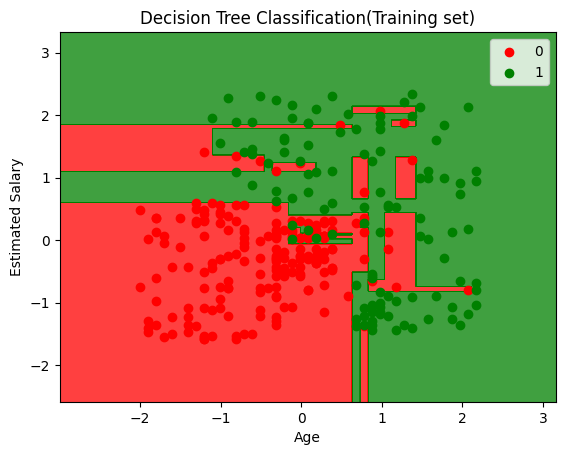

In [10]:
#visualizing the training set results
from matplotlib.colors import ListedColormap
X_set , Y_set = X_train , Y_train
X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),
                      np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step =0.01))
plt.contourf(X1, X2 ,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75 , cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0] , X_set[Y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)

plt.title('Decision Tree Classification(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\mansi\AppData\Local\Temp\ipykernel_8140\3622332442.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j , 1], c = ListedColormap(('red', 'green'))(i), label = j)


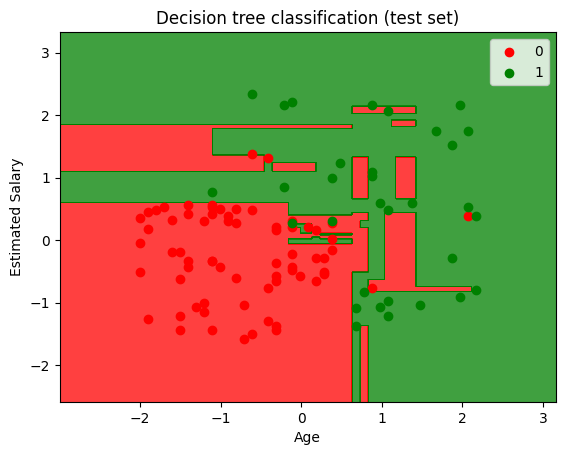

In [12]:
#visualizing the test set results
from matplotlib.colors import ListedColormap
X_set , Y_set = X_test , Y_test
X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop =  X_set[:,0].max() +1, step = 0.01),
                      np.arange(start = X_set[:,1].min() -1,stop = X_set[:,1].max()+1 , step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j , 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Decision tree classification (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()